# Prétraitement des images 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from os import listdir
from sklearn import preprocessing
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Import du dataset

In [3]:
path = "./Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))
list_photos[0]

1050


'aa68675f50a0551b8dadb954017a50a1.jpg'

In [4]:
# Chargement du dataframe avec l'id du produit et sa catégorie
df = pd.read_csv('csv/text_clean.csv')
df.head(2)

,Unnamed: 0,uniq_id,product_name_clean,description_clean,main_category,main_category_num,description_name
0,0,55b85ea15a1536d46b7190ad6fff8ce7,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...,Home Furnishing,4,key feature elegance polyester multicolor abst...
1,1,7b72c92c2f6c40268628ec5f14c6d590,sathiyas cotton bath towel,specification cotton bath towel bath towel red...,Baby Care,0,specification cotton bath towel bath towel red...


In [5]:
df['image_path'] = df.uniq_id + '.jpg'
df.head(3)

,Unnamed: 0,uniq_id,product_name_clean,description_clean,main_category,main_category_num,description_name,image_path
0,0,55b85ea15a1536d46b7190ad6fff8ce7,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...,Home Furnishing,4,key feature elegance polyester multicolor abst...,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,1,7b72c92c2f6c40268628ec5f14c6d590,sathiyas cotton bath towel,specification cotton bath towel bath towel red...,Baby Care,0,specification cotton bath towel bath towel red...,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,2,64d5d4a258243731dc7bbb1eef49ad74,eurospa cotton terry face towel set,key feature cotton terry face towel set size s...,Baby Care,0,key feature cotton terry face towel set size s...,64d5d4a258243731dc7bbb1eef49ad74.jpg


## Détermination et affichage des descripteurs ORB

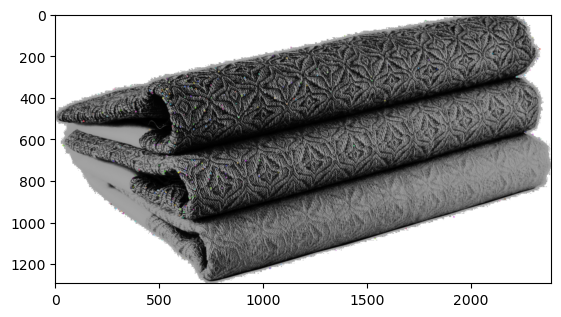

Descripteurs :  (500, 32)
[[102 237 208 ... 122 242 138]
 [ 45 244 240 ... 255 246 211]
 [ 46 188 231 ... 116 226 134]
 ...
 [229 204 210 ... 125 232 142]
 [ 45 236  88 ... 251  72 208]
 [ 75  56 250 ... 133  29 127]]


In [6]:
orb =  cv2.ORB_create()
image = cv2.imread(path+df.image_path[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = orb.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print(des)

# Pré-traitement des images via ORB

In [7]:
# identification of key points and associated descriptors
orb_keypoints = []
temps1=time.time()
orb = cv2.ORB_create()

for image_num in range(len(list_photos)):
    if image_num%100 == 0 : print(image_num)  
    image = cv2.imread(path+list_photos[image_num],0) 
    image = cv2.GaussianBlur(image, (5, 5), 0)
    equalized = cv2.equalizeHist(image)  
    kp, des = orb.detectAndCompute(equalized, None)
    orb_keypoints.append(des)

orb_keypoints_by_img = np.asarray(orb_keypoints, dtype=object)
orb_keypoints_all    = np.concatenate(orb_keypoints_by_img, axis=0)

print("Nombre de descripteurs : ", orb_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement ORB descriptor : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
Nombre de descripteurs :  (517864, 32)
temps de traitement ORB descriptor :            58.80 secondes


## Création des clusters de descripteurs

In [8]:
a = pd.DataFrame(orb_keypoints_all)
a

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,41,178,245,93,126,31,233,123,119,232,...,239,157,30,110,117,172,255,172,112,253
1,203,118,107,65,106,252,189,23,236,79,...,165,66,70,61,58,192,14,132,129,249
2,124,165,125,96,168,105,81,59,227,181,...,234,4,219,217,69,125,226,128,198,34
3,77,97,53,36,13,15,71,184,232,164,...,249,8,229,184,69,60,66,50,67,98
4,3,157,61,137,246,231,179,231,94,77,...,113,255,45,20,190,194,148,72,181,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517859,194,32,170,8,89,245,89,64,167,7,...,146,210,87,125,146,63,50,37,124,70
517860,126,149,123,254,253,253,87,249,151,196,...,250,255,123,255,133,63,179,239,246,242
517861,41,221,119,223,244,223,111,253,125,104,...,121,255,119,255,231,192,79,186,224,253
517862,199,26,175,150,172,164,169,0,236,218,...,183,224,29,58,250,130,140,97,113,117


In [9]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(orb_keypoints_all)),0))
#k=40
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(orb_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  720
Création de 720 clusters de descripteurs ...


/opt/anaconda3/envs/tf_image/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


temps de traitement kmeans :            17.74 secondes


## Création des features des images

In [10]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(orb_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :            20.11 secondes


## Réductions de dimension

In [11]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 720)
Dimensions dataset après réduction PCA :  (1050, 569)


In [14]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df["main_category"]
print(df_tsne.shape)

(1050, 3)


In [15]:
df_tsne.groupby("class").count()

,tsne1,tsne2
class,,
Baby Care,150,150
Beauty and Personal Care,150,150
Computers,150,150
Home Decor & Festive Needs,150,150
Home Furnishing,150,150
Kitchen & Dining,150,150
Watches,150,150


## Analyse visuelle : affichage T-SNE selon catégories d'images

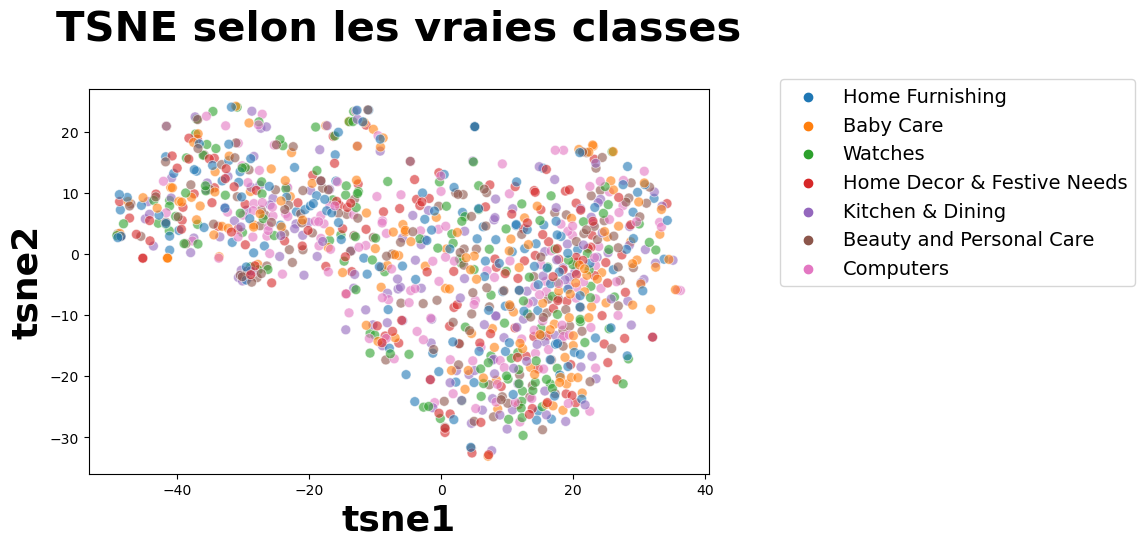

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14},bbox_to_anchor=(1.1, 1.05)) 

plt.show()

## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [17]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

/opt/anaconda3/envs/tf_image/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(1050, 4)


In [18]:
df_tsne

,tsne1,tsne2,class,cluster
0,32.288391,9.127267,Home Furnishing,0
1,-9.095716,-5.445163,Baby Care,6
2,7.775954,-12.218018,Baby Care,2
3,-37.084064,13.579617,Home Furnishing,1
4,23.406538,-13.752060,Home Furnishing,5
...,...,...,...,...
1045,-34.461769,3.129893,Baby Care,1
1046,8.079275,-15.295921,Baby Care,2
1047,-12.832594,12.098344,Baby Care,3
1048,-24.280132,8.690912,Baby Care,3


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters

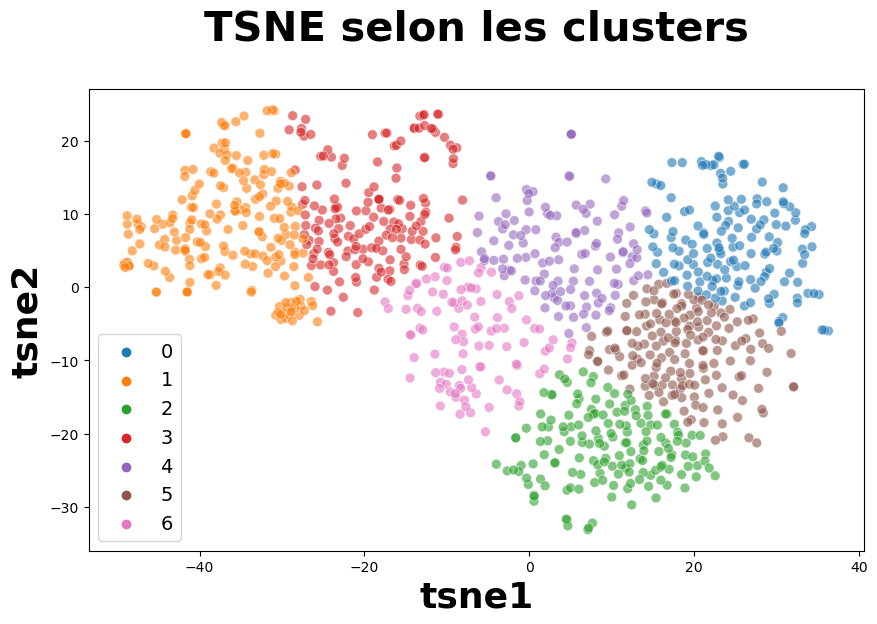

ARI :  0.0005947026352308938


In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df["main_category_num"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [27]:
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score, fowlkes_mallows_score

# Calcul du Silhouette Score
silhouette = silhouette_score(X_tsne, cls.labels_)

# Calcul de l'homogénéité, de la complétude et de la V-mesure
homogeneity = homogeneity_score(labels, cls.labels_)
completeness = completeness_score(labels, cls.labels_)
v_measure = v_measure_score(labels, cls.labels_)

# Calcul de l'indice de Fowlkes-Mallows
fm_index = fowlkes_mallows_score(labels, cls.labels_)

print(f'Silouette:{silhouette}, homogeneity:{homogeneity},completeness:{completeness},v_measure:{v_measure},fm_index:{fm_index} ')

Silouette:0.36318567395210266, homogeneity:0.01003172540464629,completeness:0.010135468582996316,v_measure:0.010083330158309612,fm_index:0.14530469904370802 


Le score ARI est très bas, ce qui signifie que les clusters ne sont pas fait correctement.

### Analyse par classes

In [28]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    147
1    199
2    155
3    163
4    120
5    165
6    101
Name: class, dtype: int64

On voit que les classes ne sont pas réparties correctements.

In [34]:
def classification_accuracy(df_name):
    train_data, test_data, train_labels, test_labels = train_test_split(X, df.main_category_num, test_size=0.2, random_state=42)
    classifier = SVC()
    classifier.fit(train_data,train_labels)
    predictions = classifier.predict(test_data)
    accuracy = accuracy_score(test_labels, predictions)
    print(f"Accuracy : {round((accuracy * 100),2)}%")

In [37]:
X = df_tsne[['tsne1', 'tsne2']]
classification_accuracy(X)

Accuracy : 10.48%
